# Import Necesarry Libraries and Files

In [1]:
# Libraries
import pymssql
import nbformat
import pandas as pd
import matplotlib.pyplot as plt

# Files
%run ./SQL_Server_settings.ipynb

# Connecting Python with SQL Server

In [2]:
conn = pymssql.connect(
    server = server,
    user = user,
    password = password,
    database = "Console_And_Gaming",
    as_dict=True
)

cursor = conn.cursor()

# Creating Data to Visualization

In [43]:
top_10_Consoles = '''
SELECT TOP 10 Console_Name,
    Units_sold_in_million
FROM Console
ORDER BY Units_sold_in_million DESC
'''
cursor.execute(top_10_Consoles)
records = cursor.fetchall()

df = pd.DataFrame(records)

In [44]:
df["Units_sold_in_million"] = df["Units_sold_in_million"].astype(int)

In [58]:
df['Units_sold_in_million'].sort_values(ascending = True)

9     55
8     58
7     62
6     84
5     87
4    101
3    102
2    117
1    138
0    155
Name: Units_sold_in_million, dtype: int64

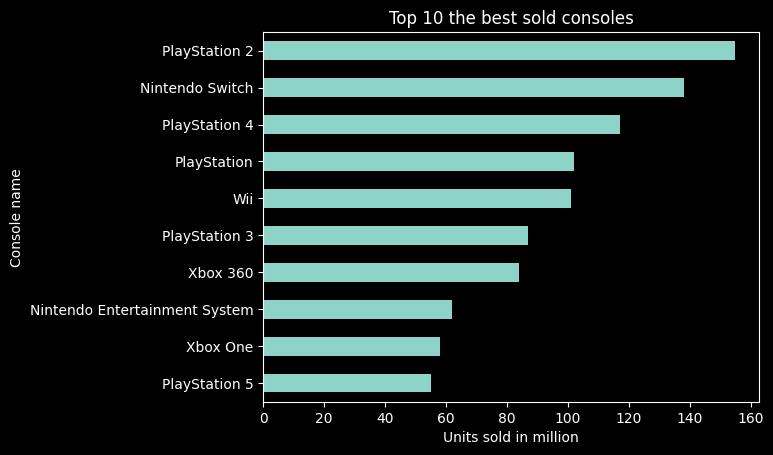

In [88]:
df.sort_values("Units_sold_in_million", ascending=True).plot.barh(x = "Console_Name", y = 'Units_sold_in_million')
plt.xlabel("Units sold in million")
plt.ylabel("Console name")
plt.legend().remove()
plt.title("Top 10 the best sold consoles")
plt.style.use('dark_background')


In [89]:
top_10_Games = '''
SELECT TOP 10 Game_Name,
    Units_m
FROM Games
ORDER BY Units_m DESC
'''

cursor.execute(top_10_Games)
records_games = cursor.fetchall()

df_games = pd.DataFrame(records_games)

In [90]:
df_games["Units_m"] = df_games["Units_m"].astype(int)

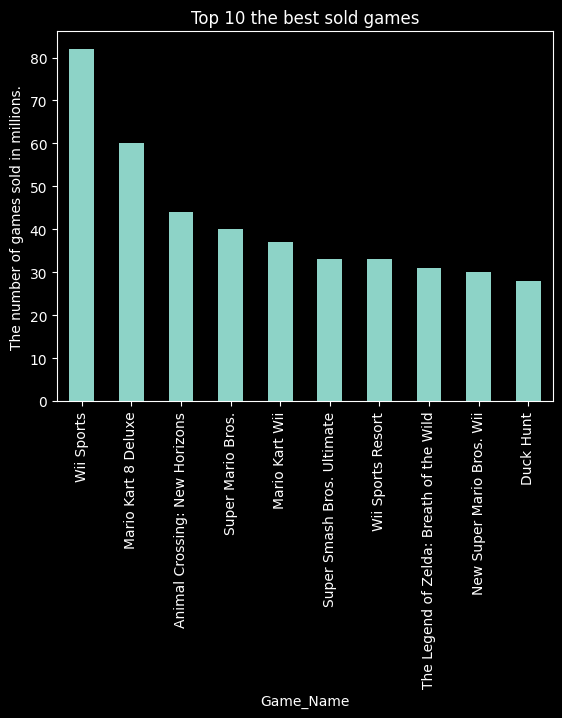

In [93]:
df_games.plot(x = "Game_Name", y = "Units_m", kind = "bar")
plt.ylabel("The number of games sold in millions.")
plt.title("Top 10 the best sold games")
plt.legend().remove()